<h1>Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display



<h1> Input Data

In [2]:
file_path = "kc_house_data.csv"
pd.set_option('display.float_format', '{:,.0f}'.format)

data = pd.read_csv(file_path)
data = data.drop(columns=['id'])


print(data.head(10))
print(data.shape)


              date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000   221,900         3          1         1180      5650   
1  20141209T000000   538,000         3          2         2570      7242   
2  20150225T000000   180,000         2          1          770     10000   
3  20141209T000000   604,000         4          3         1960      5000   
4  20150218T000000   510,000         3          2         1680      8080   
5  20140512T000000 1,225,000         4          4         5420    101930   
6  20140627T000000   257,500         3          2         1715      6819   
7  20150115T000000   291,850         3          2         1060      9711   
8  20150415T000000   229,500         3          1         1780      7470   
9  20150312T000000   323,000         3          2         1890      6560   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0       1           0     0          3      7        1180              0   
1       2  

In [3]:
#extracting year from date
data['year'] = data['date'].str[:4].astype(int)
data.drop(columns=['date'], inplace=True)
print(data.head(10))

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   221,900         3          1         1180      5650       1           0   
1   538,000         3          2         2570      7242       2           0   
2   180,000         2          1          770     10000       1           0   
3   604,000         4          3         1960      5000       1           0   
4   510,000         3          2         1680      8080       1           0   
5 1,225,000         4          4         5420    101930       1           0   
6   257,500         3          2         1715      6819       2           0   
7   291,850         3          2         1060      9711       1           0   
8   229,500         3          1         1780      7470       1           0   
9   323,000         3          2         1890      6560       2           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180             

In [4]:
#split train val test
train_df, temp_df = train_test_split(data, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
combined_df = pd.concat([train_df, val_df, test_df])

#reset index
train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 17290, Validation: 2161, Test: 2162


<h1> Data Exploration

In [5]:
summary = train_df.describe()
print(summary)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
count    17,290    17,290     17,290       17,290    17,290  17,290   
mean    537,768         3          2        2,074    14,799       1   
std     361,464         1          1          907    38,839       1   
min      75,000         0          0          290       520       1   
25%     320,150         3          2        1,430     5,001       1   
50%     450,000         3          2        1,910     7,600       2   
75%     640,000         4          2        2,540    10,607       2   
max   7,700,000        33          8       12,050 1,164,794       4   

       waterfront   view  condition  grade  sqft_above  sqft_basement  \
count      17,290 17,290     17,290 17,290      17,290         17,290   
mean            0      0          3      8       1,786            288   
std             0      1          1      1         822            439   
min             0      0          1      1         290              

In [6]:
missing_values = combined_df.isnull().sum()

print(missing_values)
print(data.dtypes)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
dtype: int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int32
dtype: object


<Figure size 1500x1000 with 0 Axes>

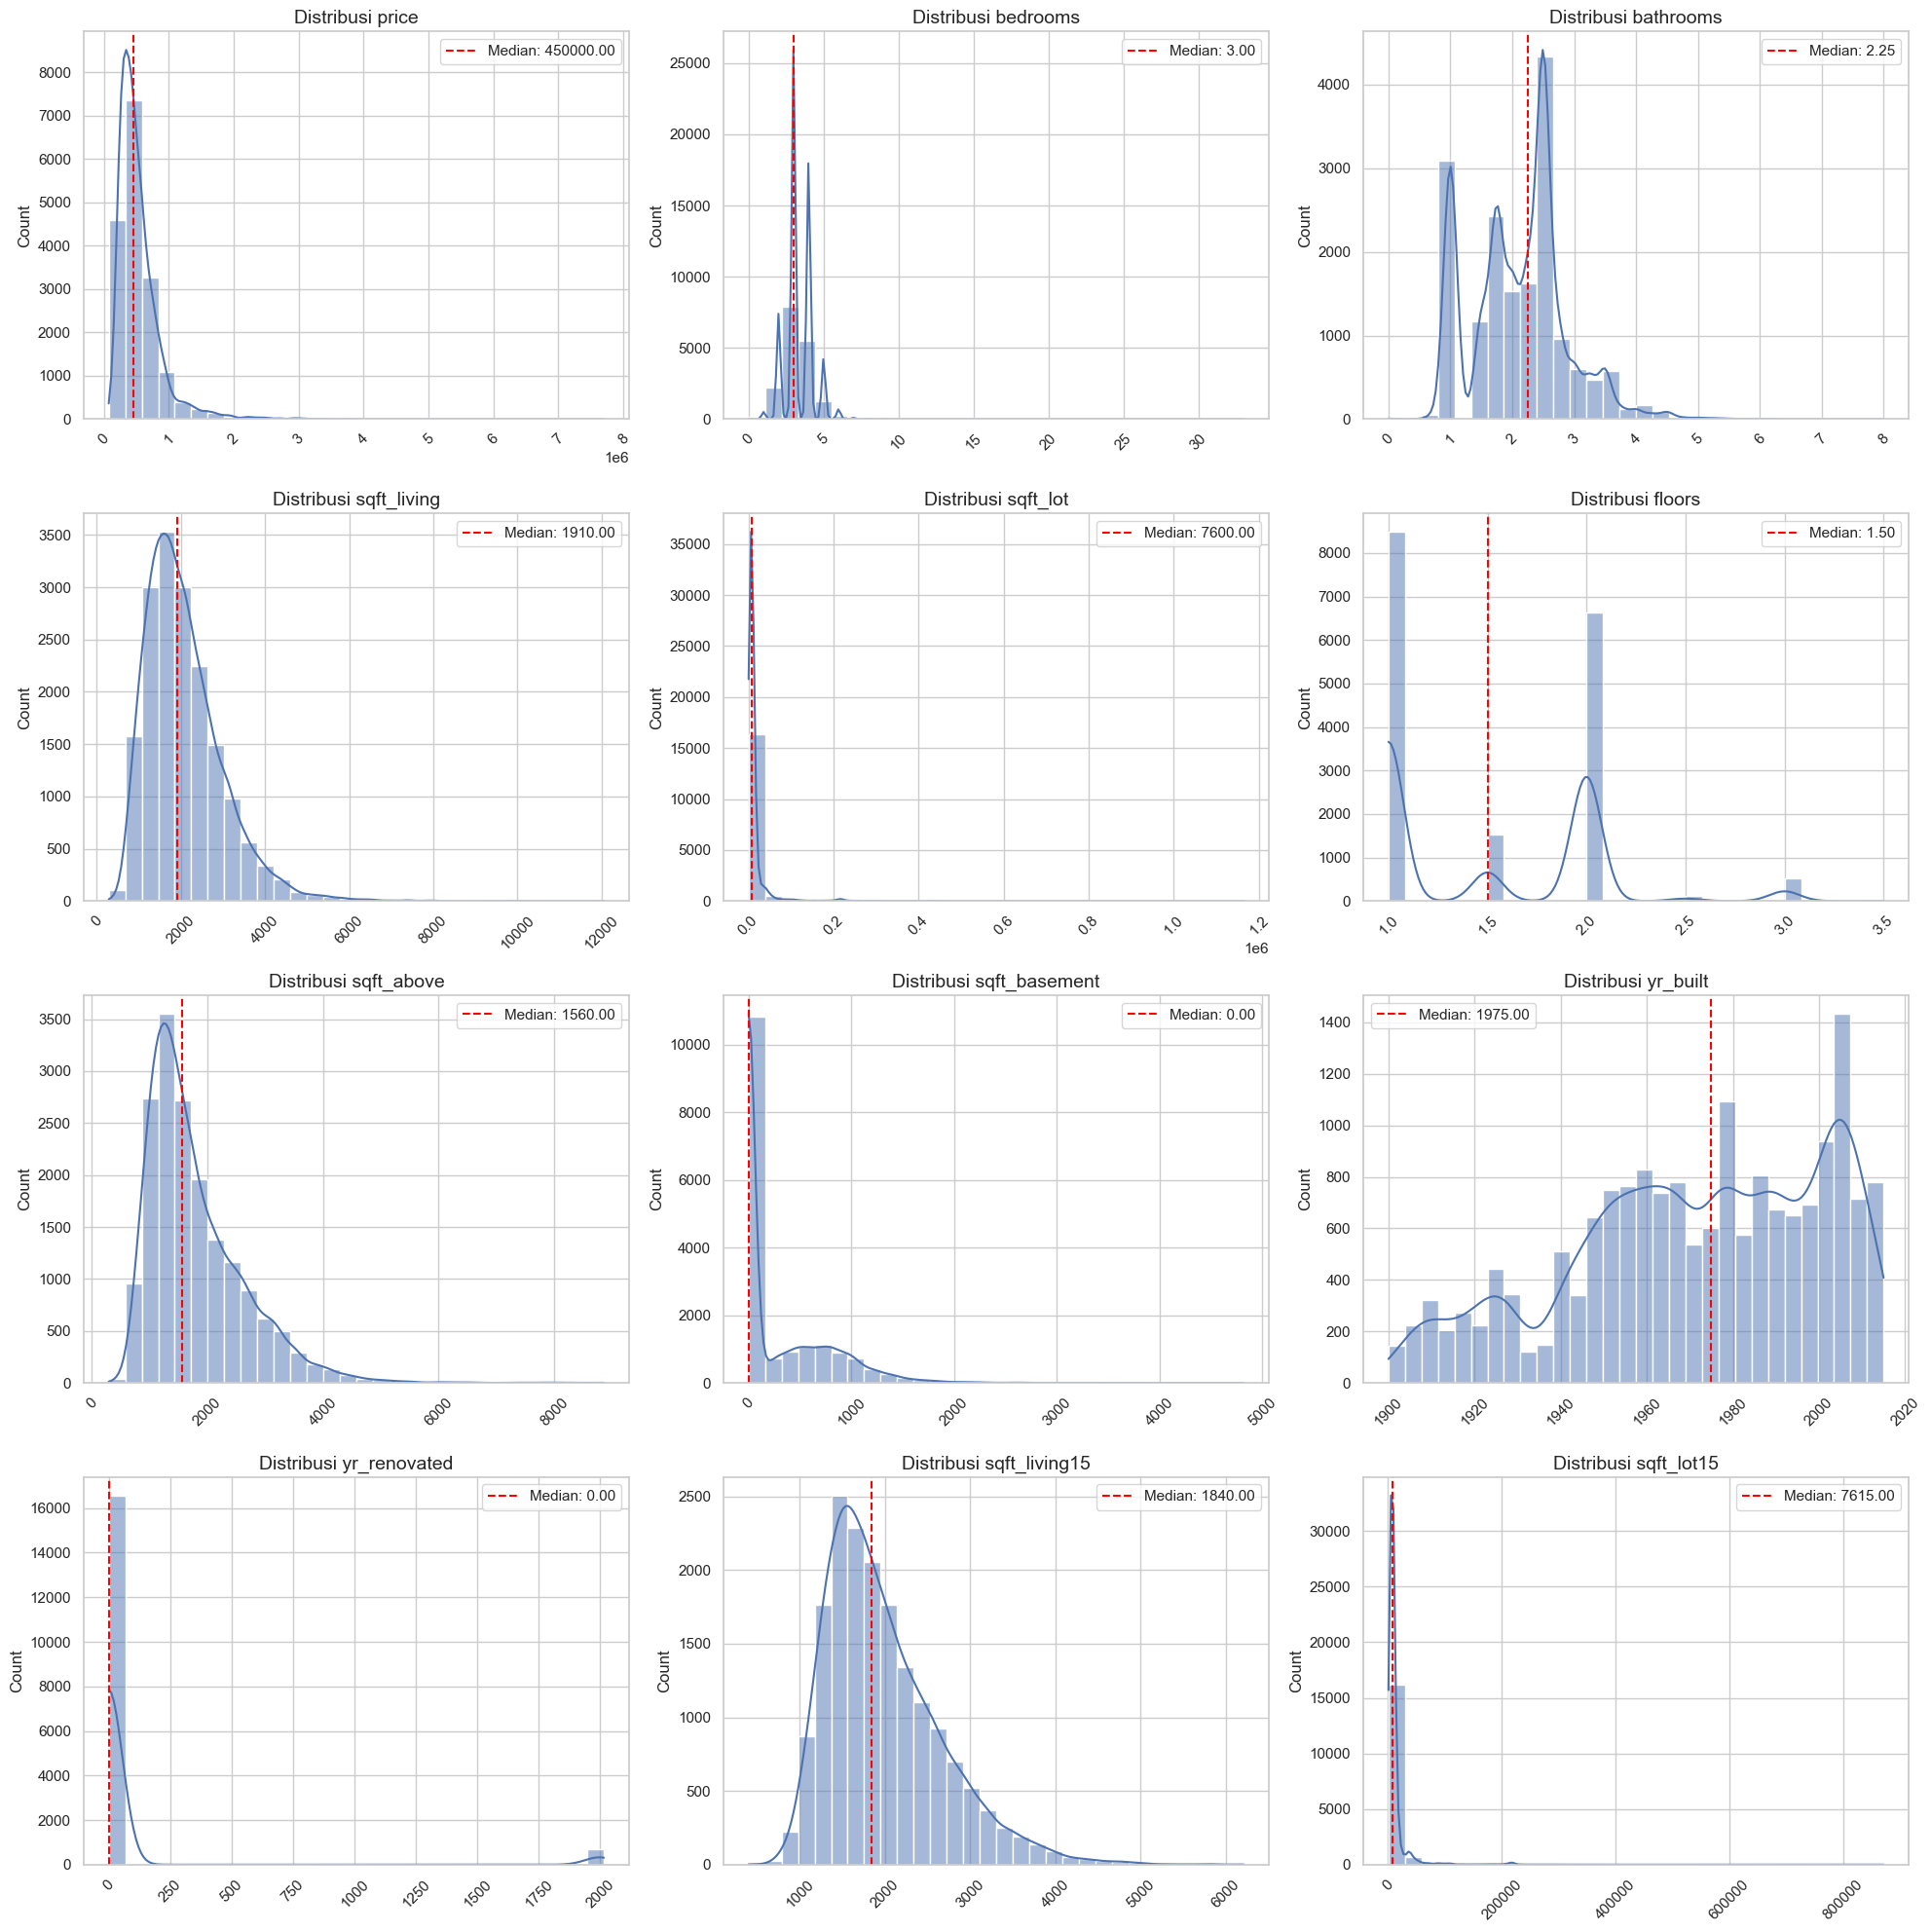

In [7]:
# Set style untuk visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# List fitur numerik yang akan diplot
numerical_features = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 
    'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'
]

# Membuat subplot grid
n_cols = 3
n_rows = np.ceil(len(numerical_features)/n_cols).astype(int)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()  # Flatten untuk memudahkan iterasi

# Loop melalui setiap fitur numerik
for i, col in enumerate(numerical_features):
    ax = axes[i]
    
    # Plot histogram dengan KDE
    sns.histplot(data=train_df, x=col, bins=30, kde=True, ax=ax)
    
    # Menambahkan garis median
    median_val = train_df[col].median()
    ax.axvline(median_val, color='red', linestyle='--', 
               label=f'Median: {median_val:.2f}')
    
    # Formatting
    ax.set_title(f'Distribusi {col}', fontsize=14)
    ax.set_xlabel('')
    ax.legend()
    
    # Rotasi label x jika diperlukan
    plt.setp(ax.get_xticklabels(), rotation=45)

# Menyembunyikan axes yang tidak terpakai
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

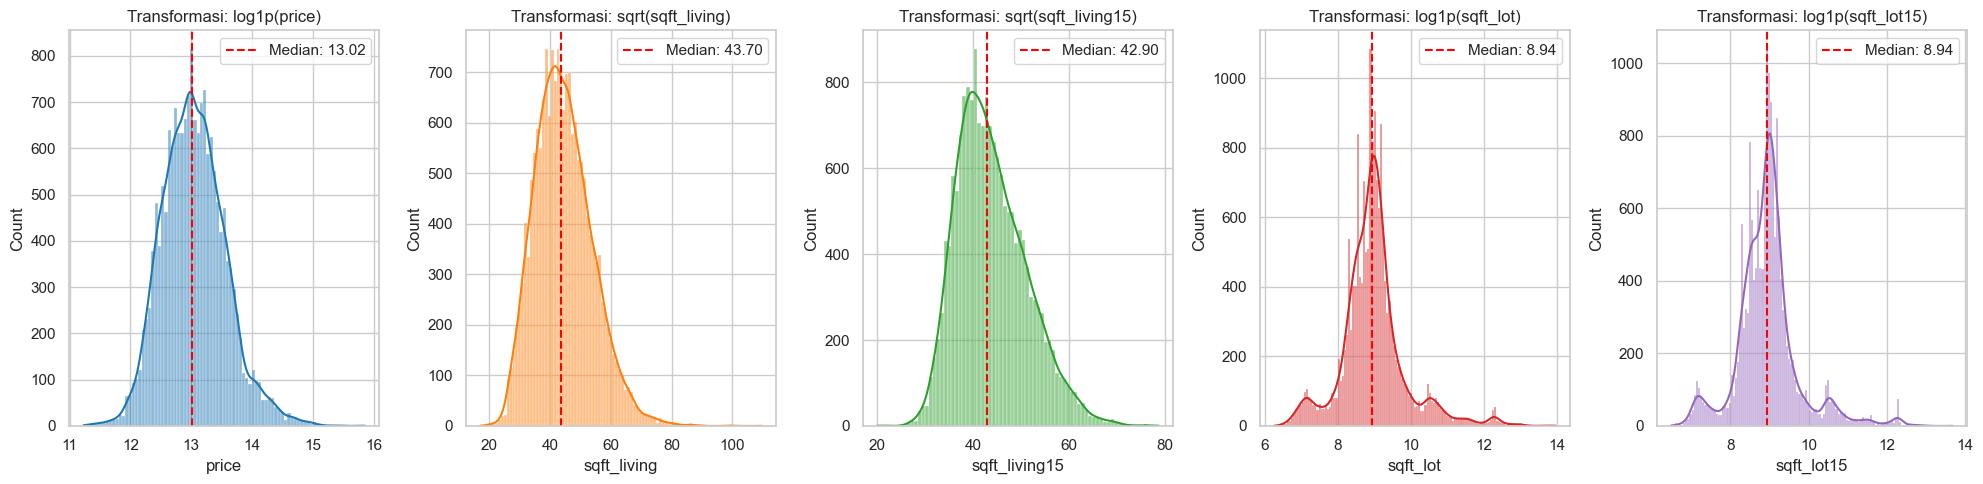

In [8]:
train_transforms = {
    'price': np.log1p,
    'sqft_living': np.sqrt,
    'sqft_living15': np.sqrt,
    'sqft_lot': np.log1p,
    'sqft_lot15': np.log1p
}

# Visualisasi setelah transformasi (hanya untuk train)
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(train_transforms), figsize=(20, 5))

for i, (col, func) in enumerate(train_transforms.items()):
    # Transformasi dan timpa kolom aslinya di train
    train_df[col] = func(train_df[col])

    # Visualisasi hasil transformasi
    ax = axes[i]
    sns.histplot(train_df[col], kde=True, ax=ax, color=plt.cm.tab10(i))
    median_val = train_df[col].median()
    ax.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}')
    ax.set_title(f'Transformasi: {func.__name__}({col})', fontsize=12)
    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()
plt.show()

In [10]:
print(train_df.head(10))

   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     13         3          2           42         9       1           0   
1     12         2          1           32         8       1           0   
2     12         3          1           33         9       2           0   
3     13         3          2           46         9       1           0   
4     13         2          2           42         7       2           0   
5     13         3          2           48        11       2           0   
6     13         5          3           45         9       1           0   
7     14         5          2           58         9       1           0   
8     13         3          2           42         9       1           0   
9     13         3          2           40         9       2           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          4      9        1780              0      1983             0   
1  

In [11]:
for col, func in train_transforms.items():
    val_df[col] = func(val_df[col])
    test_df[col] = func(test_df[col])

print(val_df.head(10))
print(test_df.head(10))

   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     13         2          1           28         8       1           0   
1     14         3          3           52        10       1           0   
2     13         2          1           30         8       1           0   
3     13         3          2           42        10       1           0   
4     13         4          2           49         9       2           0   
5     13         3          2           47         9       1           0   
6     12         3          2           36         9       2           0   
7     14         5          4           61         9       2           0   
8     13         3          2           40         9       1           0   
9     13         4          2           50         9       1           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      6         790              0      1948             0   
1  

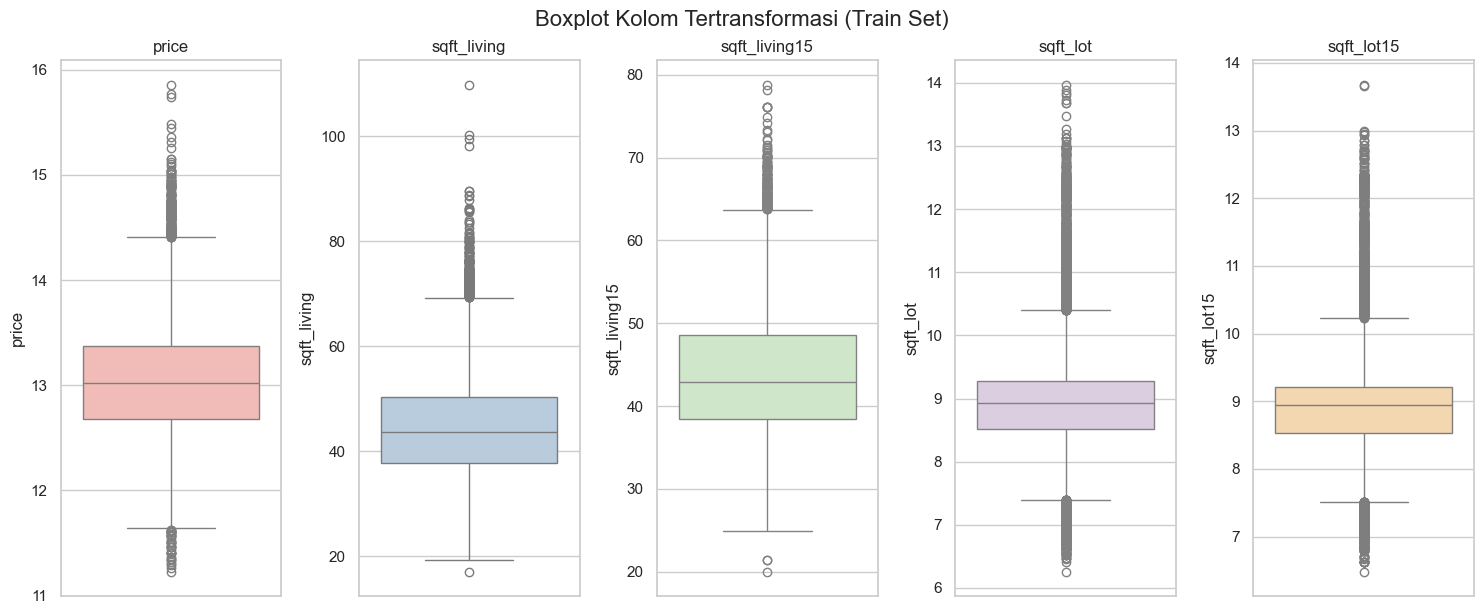

In [12]:
# Pilih kolom-kolom yang sudah ditransformasi
cols_to_plot = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']

# Buat subplots boxplot untuk tiap kolom
plt.figure(figsize=(15, 6))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    sns.boxplot(y=train_df[col], color=plt.cm.Pastel1(i))
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplot Kolom Tertransformasi (Train Set)", y=1.02, fontsize=16)
plt.show()

In [18]:
# Ambil 5 baris teratas berdasarkan price
top_5_price = train_df.sort_values(by='price', ascending=False).head(5).copy()

# Tambahkan kolom harga asli (sebelum log transform)
top_5_price['original_price'] = np.expm1(top_5_price['price'])

# Atur lebar kolom agar tidak terpotong (jika di Jupyter)
pd.set_option('display.max_columns', None)  # tampilkan semua kolom
pd.set_option('display.width', 1000)        # atur lebar tampilan

# Tampilkan hasil
display(top_5_price)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,original_price
6043,16,6,8,110,10,2,0,3,4,13,8570,3480,1910,1987,98102,48,-122,63,9,2014,"7,700,000"
2580,16,5,4,100,11,2,1,2,3,11,7680,2360,1940,2001,98004,48,-122,63,10,2014,"7,062,500"
3196,16,6,8,99,10,2,0,4,3,13,8860,1030,2001,0,98039,48,-122,67,11,2014,"6,885,000"
716,15,6,6,86,10,2,1,4,4,12,5000,2390,1991,0,98040,48,-122,66,10,2015,"5,300,000"
10345,15,5,5,89,11,2,1,4,3,12,5990,2020,1999,0,98033,48,-122,59,10,2014,"5,110,800"


In [17]:
# Menghitung IQR dan mendeteksi outlier
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Buat salinan DataFrame hanya dengan outlier
    outlier_df = outliers[[column]].copy()
    
    # Tambahkan kolom dengan nilai aslinya
    outlier_df['Original_Value'] = np.expm1(outlier_df[column])  # Reverse log transform
    
    return outlier_df

# Cek outlier untuk 'sqft_lot_log'
outliers_lot_log = detect_outliers_iqr(data, 'sqft_lot_log')

# Tampilkan hasil
print("Outlier untuk Log lot_log dengan nilai aslinya:")
print(outliers_lot_log)


Outlier untuk Log lot_log dengan nilai aslinya:
       sqft_lot_log  Original_Value
5                12         101,930
21               11          44,867
27                7           1,581
31                7           1,265
36               10          34,848
...             ...             ...
21604             7           1,126
21607             7           1,294
21608             7           1,131
21610             7           1,350
21612             7           1,076

[2555 rows x 2 columns]


In [18]:
data.loc[[5, 21, 27, 31, 36]]  # contoh index dari outlier


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,log_price,sqft_living_sqrt,sqft_living15_sqrt,sqft_lot_log,sqft_lot15_log
5,"1,225,000",4,4,5420,101930,1,0,0,3,11,...,48,-122,4760,101930,2014,14,74,69,12,12
21,"2,000,000",3,3,3050,44867,1,0,4,3,9,...,48,-122,4110,20336,2014,15,55,64,11,10
27,"667,000",3,1,1400,1581,2,0,0,5,8,...,48,-122,1860,3861,2014,13,37,43,7,8
31,"280,000",2,2,1190,1265,3,0,0,3,7,...,48,-122,1390,1756,2014,13,34,37,7,7
36,"550,000",4,1,1660,34848,1,0,0,1,5,...,48,-122,2160,11467,2014,13,41,46,10,9


<h1>XGBoost

In [15]:
import xgboost as xgb

# Konversi ke DMatrix (format khusus XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Parameter XGBoost (sederhana)
params = {
    "objective": "reg:squarederror",  # Regression task
    "eval_metric": "mae",  # Mean Absolute Error
    "learning_rate": 0.1,
    "max_depth": 6,
    "n_jobs": -1  # Gunakan semua core CPU
}

# Training model (3 epoch)
watchlist = [(dtrain, "train"), (dval, "eval")]
model = xgb.train(params, dtrain, num_boost_round=3, evals=watchlist)

# Evaluasi di test set
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Test): {mae:.2f}")

[0]	train-mae:213023.25717	eval-mae:321767.16511


[1]	train-mae:196535.93964	eval-mae:552966.19615
[2]	train-mae:181855.67833	eval-mae:745754.93001
Mean Absolute Error (Test): 197079.73


<h1>LightGBM

In [9]:
import lightgbm as lgb
print(lgb.__version__)


4.6.0


<h1>CatBoost

In [10]:
import catboost
print(catboost.__version__)


1.2.7
